In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Code for Learning Curve

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1,len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

### The Polynomial Regression Code

In [ ]:
m = 100
X = 3 * np.random.randn(m, 1)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

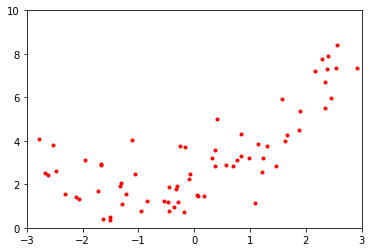

In [ ]:
plt.plot(X, y, 'r.')
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
degree = 3

poly_features = PolynomialFeatures(degree=degree, include_bias = False)# Tune the degree
X_poly = poly_features.fit_transform(X)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

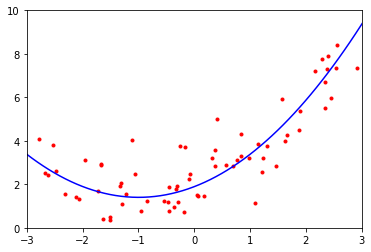

In [ ]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)#Converts the list(1D) to 2D array
plt.plot(X, y, 'r.')
plt.plot(X_grid, poly_regressor.predict(poly_features.fit_transform(X_grid)), 'b-')
plt.axis([-3, +3, 0, 10])
plt.show()

### Plotting the Learing Curve

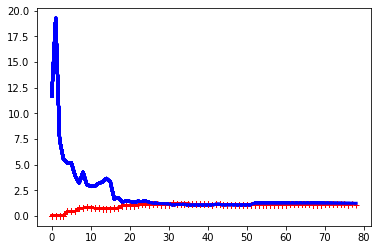

In [ ]:
plot_learning_curves(poly_regressor, X_poly, y)